old data MSD calc

In [1]:
# importing libraries

import os
import glob
import matplotlib
import numpy             as     np
import matplotlib.pyplot as     plt
import random

plt.rcParams.update({
  "figure.max_open_warning": 0,
  "text.usetex": True,
  "text.latex.preamble": r"\usepackage{type1cm}",
  "figure.autolayout": True,
  "font.family": "STIXGeneral",
  "mathtext.fontset": "stix",
  "font.size":        8,
  "xtick.labelsize":  8,
  "ytick.labelsize":  8,
  "lines.linewidth":  1,
  "lines.markersize": 5
})
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble'] = r'\boldmath'
colors = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']

In [2]:
def parametersList(ParametersFile):
    '''
    This function reads the parameters file and creates a nested-list,
    each list inside contains the array of all interaction parameters for
    that timestep.

    Input: ParametersFile - the location of the parameters data file
    '''

    parFile = open(ParametersFile, 'r')

    hashCounter = 0
    temp        = []
    parList     = [] # list with parameters parameters for each element at each timestep

    fileLines = parFile.readlines()[22:] # skipping the comment lines
    for line in fileLines:
        if not line.split()[0] == '#':
            lineList = [float(value) for value in line.split()]
            temp.append(lineList)
        else:
            hashCounter    += 1 # checking if counter reaches 7 (7 lines of comments after every timestep data)
            if hashCounter == 7: 
                parList.append(np.array(temp))
                temp        = []
                hashCounter = 0
    parFile.close()
    return parList

def particleSizeList(randomSeedFile, sizeRatio, npp = 1000):
    '''
    This function reads the random seed file and creates
    a list of particle sizes. The list index is the particle index.

    Inputs:
    randomSeedFile - location for the random seed file. It contains the particle index and sizes
    sizeRatio      - delta or ar for the case
    npp            - system size
    '''

    if sizeRatio == 1:
        # Painting particles randomly in two colours for monodisperse case.
        particleSize = [1]*(int(npp/2)) + [2]*(int(npp/2))
        random.shuffle(particleSize)
    else:
        particleSize = np.loadtxt(randomSeedFile, usecols = 3) # reading only column 3 which has particle size
        randomSeedFile.close()
    return particleSize

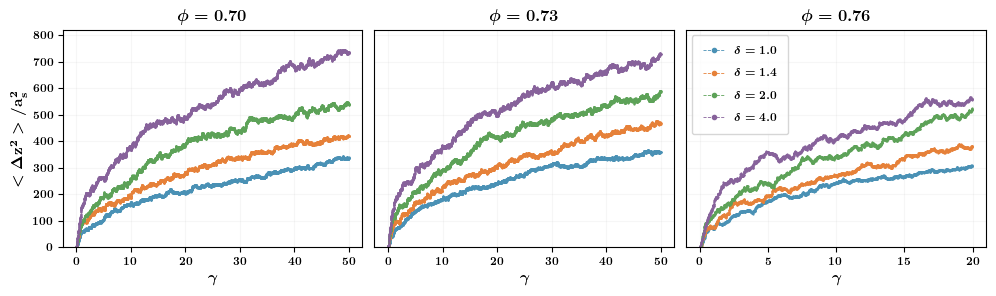

In [91]:
# plot 1

phi_vals = [0.70, 0.73, 0.76]
ar_vals  = [1, 1.4, 2.0, 4.0]
numRuns  = 4
npp      = 1000

topDir        = '/media/rahul/Rahul_2TB/high_bidispersity/'
fig_save_path = '/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/MSD/'

fig,axs = plt.subplots(nrows=1, ncols=len(phi_vals), figsize=(10, 3))

for k, phi in enumerate(phi_vals):
    for j, ar in enumerate(ar_vals):
        phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
        msd1 = [[] for _ in range(numRuns)]
        workDir = f"{topDir}NP_{npp}/phi_{phir}/ar_{ar:.1f}/Vr_0.5/"
        if os.path.exists(workDir):
            for run in range(numRuns):
                parFile = glob.glob(f'{workDir}/run_{run+1}/par_*.dat')[0]
                parList = parametersList(parFile)
                
                gamma = [(x+1)/100 for x in range(len(parList[1:]))]
                z0    = parList[0][:,3]
                
                for i, sampList in enumerate(parList[1:]):
                    msd_val = 1/npp * np.sum((sampList[:,3] - z0)**2)
                    msd1[run].append(msd_val)
                    
            msd = np.mean(msd1, axis=0)
            axs[k].plot(gamma, msd, linestyle='--', marker='o', label=r'$\delta = {:.1f}$'.format(ar), 
                 color=colors[j],linewidth=.6, markersize=.6)
            axs[k].set_xlabel(r'$\mathbf{\gamma}$', fontsize=11)
            axs[k].set_title(fr'$\phi = {phi:.2f}$', fontsize=12)
            axs[k].grid('both', alpha = .1)
            axs[k].set_ylim(0, 820)
axs[1].tick_params(axis='y', which='both', left=False, labelleft=False)
axs[2].tick_params(axis='y', which='both', left=False, labelleft=False)
axs[0].set_ylabel(r'$\mathbf{< \Delta z^2>/a_{s}^2}$', fontsize=11)
axs[2].legend(loc = 'best', labelspacing=1.1, borderpad=1, markerscale=5)
plt.tight_layout()

if False:
    figFormat=".svg"
    plt.savefig(fig_save_path+ "MDS1_4runs" +figFormat, bbox_inches="tight",dpi=500)
plt.show()

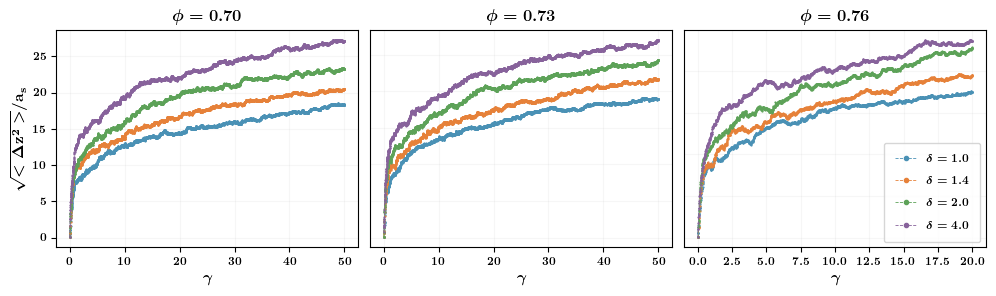

In [4]:
# plot 1 RMSD

phi_vals = [0.70, 0.73, 0.76]
ar_vals  = [1, 1.4, 2.0, 4.0]
numRuns  = 4
npp      = 1000

#topDir        = '/media/rahul/Rahul_2TB/high_bidispersity/'
#fig_save_path = '/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/MSD/'

#Mac
topDir        = '/Volumes/Rahul_2TB/high_bidispersity/'
fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/MSD/'

fig,axs = plt.subplots(nrows=1, ncols=len(phi_vals), figsize=(10, 3))

for k, phi in enumerate(phi_vals):
    for j, ar in enumerate(ar_vals):
        phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
        msd1 = [[] for _ in range(numRuns)]
        workDir = f"{topDir}NP_{npp}/phi_{phir}/ar_{ar:.1f}/Vr_0.5/"
        if os.path.exists(workDir):
            for run in range(numRuns):
                parFile = glob.glob(f'{workDir}/run_{run+1}/par_*.dat')[0]
                parList = parametersList(parFile)
                
                gamma = [(x+1)/100 for x in range(len(parList[1:]))]
                z0    = parList[0][:,3]
                
                for i, sampList in enumerate(parList[1:]):
                    msd_val = 1/npp * np.sum((sampList[:,3] - z0)**2)
                    msd1[run].append(np.sqrt(msd_val)/1**2)
                    
            msd = np.mean(msd1, axis=0)
            axs[k].plot(gamma, msd, linestyle='--', marker='o', label=r'$\delta = {:.1f}$'.format(ar), 
                 color=colors[j],linewidth=.6, markersize=.6)
            axs[k].set_xlabel(r'$\mathbf{\gamma}$', fontsize=11)
            axs[k].set_title(fr'$\phi = {phi:.2f}$', fontsize=12)
            axs[k].grid('both', alpha = .1)
            #axs[k].set_ylim(0, 820)
axs[1].tick_params(axis='y', which='both', left=False, labelleft=False)
axs[2].tick_params(axis='y', which='both', left=False, labelleft=False)
axs[0].set_ylabel(r'$\mathbf{\sqrt{< \Delta z^2>}/a_{s}}$', fontsize=11)
axs[2].legend(loc = 'best', labelspacing=1.1, borderpad=1, markerscale=5)
plt.tight_layout()

if False:
    figFormat=".svg"
    plt.savefig(fig_save_path+ "MDS1_4runs" +figFormat, bbox_inches="tight",dpi=500)
plt.show()

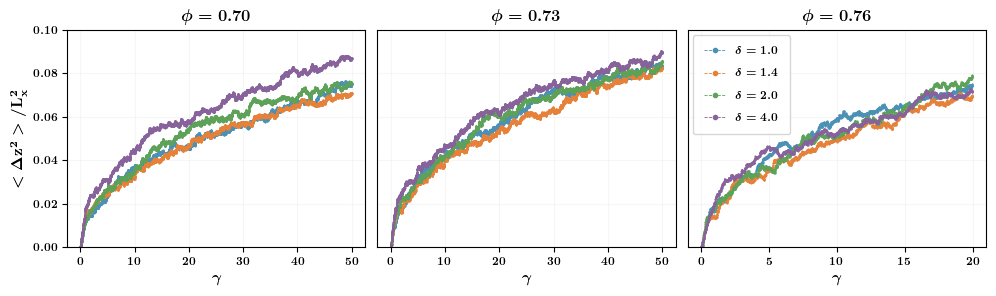

In [151]:
# plot 1.1

phi_vals = [0.70, 0.73, 0.76]
ar_vals  = [1, 1.4, 2.0, 4.0]
numRuns  = 4
npp      = 1000

topDir        = '/media/rahul/Rahul_2TB/high_bidispersity/'
fig_save_path = '/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/MSD/'

fig,axs = plt.subplots(nrows=1, ncols=len(phi_vals), figsize=(10, 3))

for k, phi in enumerate(phi_vals):
    for j, ar in enumerate(ar_vals):
        phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
        msd1 = [[] for _ in range(numRuns)]
        workDir = f"{topDir}NP_{npp}/phi_{phir}/ar_{ar:.1f}/Vr_0.5/"
        if os.path.exists(workDir):
            for run in range(numRuns):
                ranFile = open(f'{workDir}/run_{run+1}/random_seed.dat', 'r')
                lx      = float(ranFile.readlines()[1].strip().split()[6])
                
                parFile = glob.glob(f'{workDir}/run_{run+1}/par_*.dat')[0]
                parList = parametersList(parFile)
                
                gamma = [(x+1)/100 for x in range(len(parList[1:]))]
                z0    = parList[0][:,3]
                
                for i, sampList in enumerate(parList[1:]):
                    msd_val = np.mean((sampList[:,3] - z0)**2)
                    msd1[run].append(msd_val/lx**2)
                    
            msd = np.mean(msd1, axis=0)
            axs[k].plot(gamma, msd, linestyle='--', marker='o', label=r'$\delta = {:.1f}$'.format(ar), 
                 color=colors[j],linewidth=.6, markersize=.6)
            axs[k].set_xlabel(r'$\mathbf{\gamma}$', fontsize=11)
            axs[k].set_title(fr'$\phi = {phi:.2f}$', fontsize=12)
            axs[k].grid('both', alpha = .1)
            axs[k].set_ylim(0, .1)
axs[1].tick_params(axis='y', which='both', left=False, labelleft=False)
axs[2].tick_params(axis='y', which='both', left=False, labelleft=False)
axs[0].set_ylabel(r'$\mathbf{< \Delta z^2>/L_{x}^2}$', fontsize=11)
axs[2].legend(loc = 'best', labelspacing=1.1, borderpad=1, markerscale=5)
plt.tight_layout()

if True:
    figFormat=".svg"
    plt.savefig(fig_save_path+ "MDS11_4runs" +figFormat, bbox_inches="tight",dpi=500)
plt.show()

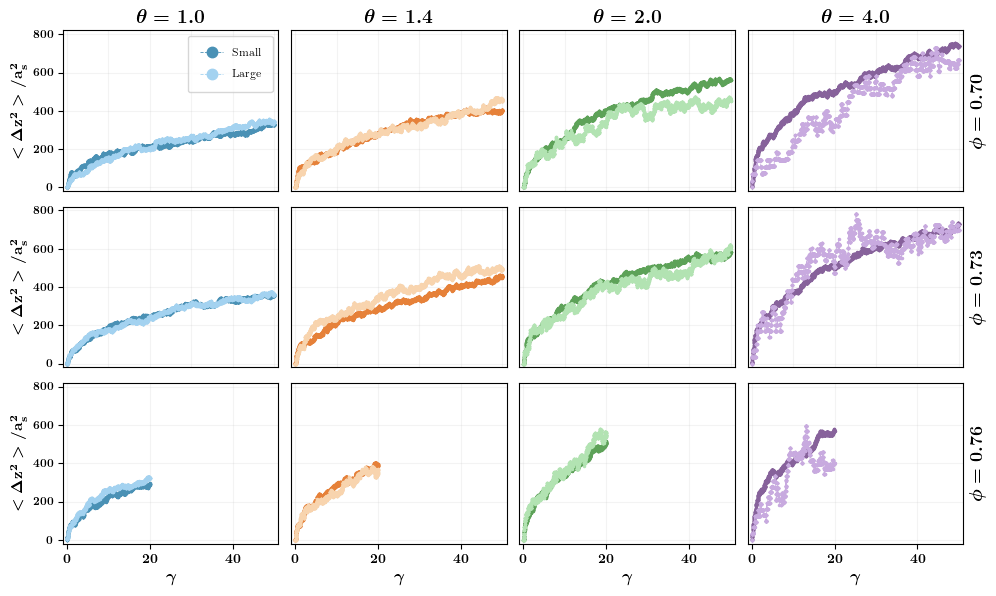

In [188]:
# plot 2

phi_vals = [0.70, 0.73, 0.76]
ar_vals  = [1, 1.4, 2.0, 4.0]
numRuns  = 4
npp      = 1000

topDir        = '/media/rahul/Rahul_2TB/high_bidispersity/'
fig_save_path = '/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/MSD/'

fig,axs = plt.subplots(nrows=len(phi_vals), ncols=len(ar_vals), figsize=(10, 2*len(phi_vals)))
colors2 = ['#a3d2f0', '#f8d4ae', '#b2e3b2', '#c8aadf', '#79eccb']

for k, phi in enumerate(phi_vals):
    for j, ar in enumerate(ar_vals):
        phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
        msds1 = [[] for _ in range(numRuns)]
        msdl1 = [[] for _ in range(numRuns)]
        workDir = f"{topDir}NP_{npp}/phi_{phir}/ar_{ar:.1f}/Vr_0.5/"
        if os.path.exists(workDir):
            for run in range(numRuns):
                ranFile      = open(f'{workDir}/run_{run+1}/random_seed.dat', 'r')
                particleSize = np.array(particleSizeList(ranFile, sizeRatio = ar))
                            
                parFile = glob.glob(f'{workDir}/run_{run+1}/par_*.dat')[0]
                parList = parametersList(parFile)
                
                gamma = [(x+1)/100 for x in range(len(parList[1:]))]
                z0    = parList[0][:,3]
                
                for i, sampList in enumerate(parList[1:]):
                    msd_val_s = np.mean(((sampList[:,3] - z0)**2)[particleSize == 1])
                    msd_val_l = np.mean(((sampList[:,3] - z0)**2)[particleSize > 1])
                    msds1[run].append(msd_val_s)
                    msdl1[run].append(msd_val_l)
                    
            msds = np.mean(msds1, axis=0)
            msdl = np.mean(msdl1, axis=0)
            axs[k,j].plot(gamma, msds, linestyle='--', marker='o', label='Small', 
                 color=colors[j],linewidth=.6, markersize=1.5)
            axs[k,j].plot(gamma, msdl, linestyle='--', marker='o', label='Large', 
                 color=colors2[j],linewidth=.6, markersize=1.5)

            axs[k,j].set_ylim([-20, 820])
            axs[k,j].set_xlim([-1, 51])
            axs[k,j].grid('both', alpha = .15)
            axs[0,j].set_title(fr'$\theta = {ar:.1f}$', fontsize=14, pad=5)
    
            axs[k,-1].set_ylabel(fr'$\mathbf{{\phi = {phir}}}$', color="black", fontsize=13, labelpad=5)
            axs[k,-1].yaxis.set_label_position("right")
            axs[k,-1].yaxis.label.set_rotation(90)
            
            if j == 0:
                axs[k,j].set_ylabel(r'$\mathbf{< \Delta z^2>/a_{s}^2}$', fontsize=11)
                axs[k,j].tick_params(axis='y', labelsize=8)
            else:
                axs[k,j].tick_params(axis='y', which='both', left=False, labelleft=False)
    
            if phi == phi_vals[-1]:
                axs[k,j].set_xlabel(r'$\gamma$', fontsize=12)
                axs[k,j].tick_params(axis='x', labelsize=10)
            else:
                axs[k,j].tick_params(axis='x', which='both', bottom=False, labelbottom=False)
            
axs[0,0].legend(loc = 'best', labelspacing=1.1, borderpad=1.1, markerscale=5)
plt.tight_layout()

if True:
    figFormat=".svg"
    plt.savefig(fig_save_path+ "MDS2_4runs" +figFormat, bbox_inches="tight",dpi=500)
plt.show()

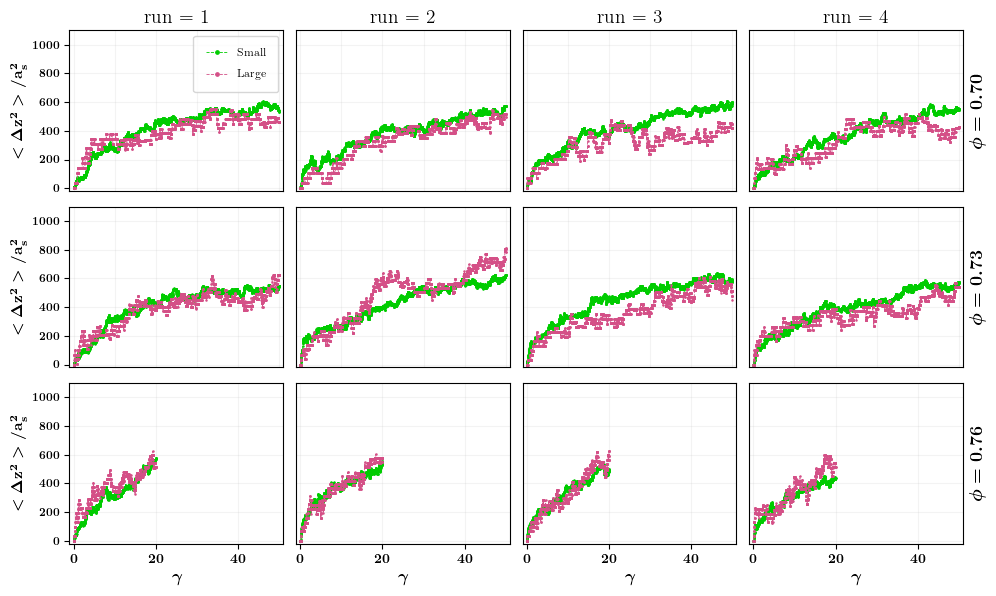

In [190]:
# plot 3

phi_vals = [0.70, 0.73, 0.76]
ar = 2.0
numRuns  = 4
npp      = 1000

topDir        = '/media/rahul/Rahul_2TB/high_bidispersity/'
fig_save_path = '/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/MSD/'

fig,axs = plt.subplots(nrows=len(phi_vals), ncols=len(ar_vals), figsize=(10, 2*len(phi_vals)))
colors1 = ['#003300', '#006600', '#009900', '#00cc00', '#00ff00']
colors2 = ['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087']

for k, phi in enumerate(phi_vals):
    phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
    workDir = f"{topDir}NP_{npp}/phi_{phir}/ar_{ar:.1f}/Vr_0.5/"
    if os.path.exists(workDir):
        for run in range(numRuns):
            ranFile      = open(f'{workDir}/run_{run+1}/random_seed.dat', 'r')
            particleSize = np.array(particleSizeList(ranFile, sizeRatio = ar))

            nps = np.sum(particleSize == 1)
            npl = np.sum(particleSize  > 1)
                        
            parFile = glob.glob(f'{workDir}/run_{run+1}/par_*.dat')[0]
            parList = parametersList(parFile)
            
            gamma = [(x+1)/100 for x in range(len(parList[1:]))]
            z0    = parList[0][:,3]

            msds = []; msdl =[]
            for i, sampList in enumerate(parList[1:]):
                msd_val_s = np.mean(((sampList[:,3] - z0)**2)[particleSize == 1])
                msd_val_l = np.mean(((sampList[:,3] - z0)**2)[particleSize > 1])
                msds.append(msd_val_s)
                msdl.append(msd_val_l)
        
            axs[k,run].plot(gamma, msds, linestyle='--', marker='o', label='Small', 
                 color=colors1[-2],linewidth=.6, markersize=.8)
            axs[k,run].plot(gamma, msdl, linestyle='--', marker='o', label='Large', 
                 color=colors2[-1],linewidth=.6, markersize=.8)
    
            axs[k,run].set_ylim([-20, 1100])
            axs[k,run].set_xlim([-1, 51])
            axs[k,run].grid('both', alpha = .15)
            axs[0,run].set_title(f'run = {run + 1}', fontsize=14, pad=5)
    
            axs[k,-1].set_ylabel(fr'$\mathbf{{\phi = {phir}}}$', color="black", fontsize=13, labelpad=5)
            axs[k,-1].yaxis.set_label_position("right")
            axs[k,-1].yaxis.label.set_rotation(90)
            
            if run == 0:
                axs[k,run].set_ylabel(r'$\mathbf{< \Delta z^2>/a_{s}^2}$', fontsize=11)
                axs[k,run].tick_params(axis='y', labelsize=8)
            else:
                axs[k,run].tick_params(axis='y', which='both', left=False, labelleft=False)
    
            if phi == phi_vals[-1]:
                axs[k,run].set_xlabel(r'$\gamma$', fontsize=12)
                axs[k,run].tick_params(axis='x', labelsize=10)
            else:
                axs[k,run].tick_params(axis='x', which='both', bottom=False, labelbottom=False)
            
axs[0,0].legend(loc = 'best', labelspacing=1.1, borderpad=1.1, markerscale=3)
plt.tight_layout()

if False:
    figFormat=".svg"
    plt.savefig(fig_save_path+ "MDS_ar_" + ar + "_individualruns" +figFormat, bbox_inches="tight",dpi=500)
plt.show()

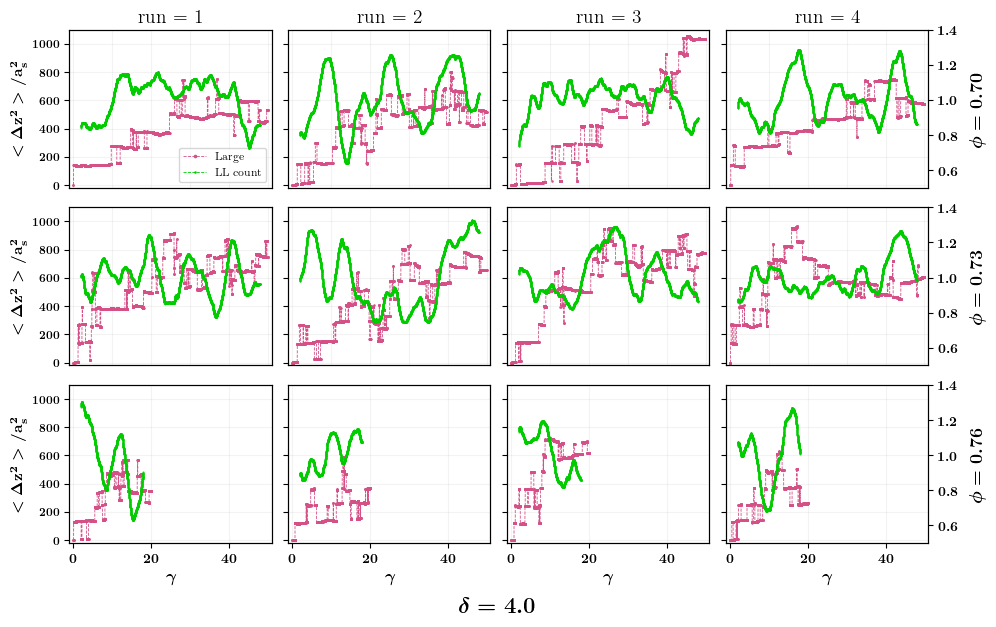

In [48]:
# plot 4

#MSD with L-L contacts

phi_vals = [0.70, 0.73, 0.76]
ar       = 4.0
numRuns  = 4
npp      = 1000

#topDir        = '/media/rahul/Rahul_2TB/high_bidispersity/'
#fig_save_path = '/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/MSD/'

#Mac
topDir        = '/Volumes/Rahul_2TB/high_bidispersity/'
fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/MSD/'

#fig,axs  = plt.subplots(nrows=len(phi_vals), ncols=len(ar_vals), figsize=(10, 2*len(phi_vals)))
colors1  = ['#003300', '#006600', '#009900', '#00cc00', '#00ff00']
colors2  = ['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087']
contFile = 'contacts.txt'
y2max    = 0

fig, ax1 = plt.subplots(nrows=len(phi_vals), ncols=len(ar_vals), figsize=(10, 2*len(phi_vals)), sharey=False)

for k, phi in enumerate(phi_vals):
    phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
    workDir = f"{topDir}NP_{npp}/phi_{phir}/ar_{ar:.1f}/Vr_0.5/"
    if os.path.exists(workDir):
        for run in range(numRuns):
            ranFile      = open(f'{workDir}/run_{run+1}/random_seed.dat', 'r')
            particleSize = np.array(particleSizeList(ranFile, sizeRatio = ar))

            nps = np.sum(particleSize == 1)
            npl = np.sum(particleSize  > 1)
                        
            parFile = glob.glob(f'{workDir}/run_{run+1}/par_*.dat')[0]
            parList = parametersList(parFile)
            
            gamma = [(x+1)/100 for x in range(len(parList[1:]))]
            z0    = parList[0][:,3]

            msds = []; msdl =[]
            for i, sampList in enumerate(parList[1:]):
                msd_val_l = np.mean(((sampList[:,3] - z0)**2)[particleSize > 1])
                msdl.append(msd_val_l)
        
            line1, = ax1[k,run].plot(gamma, msdl, linestyle='--', marker='o', label='Large', 
                     color=colors2[-1],linewidth=.6, markersize=.8)
    
            ax1[k,run].set_ylim([-20, 1100])
            ax1[k,run].set_xlim([-1, 51])
            ax1[k,run].grid('both', alpha = .15)
            ax1[0,run].set_title(f'run = {run + 1}', fontsize=14, pad=5)
    
            ax1[k,-1].set_ylabel(fr'$\mathbf{{\phi = {phir}}}$', color="black", fontsize=13, labelpad=30)
            ax1[k,-1].yaxis.set_label_position("right")
            ax1[k,-1].yaxis.label.set_rotation(90)
            
            if run == 0:
                ax1[k,run].set_ylabel(r'$\mathbf{< \Delta z^2>/a_{s}^2}$', fontsize=11)
                ax1[k,run].tick_params(axis='y', labelsize=8)
            else:
                ax1[k,run].tick_params(axis='y', which='both', left=False, labelleft=False)
    
            if phi == phi_vals[-1]:
                ax1[k,run].set_xlabel(r'$\gamma$', fontsize=12)
                ax1[k,run].tick_params(axis='x', labelsize=10)
            else:
                ax1[k,run].tick_params(axis='x', which='both', bottom=False, labelbottom=False)
            
            # LL count
            ax2 = ax1[k,run].twinx()
            conFile    = open(f'{workDir}/run_{run+1}/{contFile}', 'r')
            contData   = np.loadtxt(conFile)
            #llContacts = [x/npl for x in contData[1:,7]]
            llContacts = [x/np.mean(contData[1:,6]) for x in contData[1:,6]]
            
            # running average
            window    = 400
            gammaAvg  = np.convolve(gamma, np.ones(window) / window, mode='valid')
            llContAvg = np.convolve(llContacts, np.ones(window) / window, mode='valid')
            
            line2, = ax2.plot(gammaAvg, llContAvg, linestyle='--', marker='o', label='LL count', 
                     color=colors1[-2],linewidth=.6, markersize=.4)
            
            if run == numRuns-1:
                ax2.tick_params(axis='y', labelsize=10)
            else:
                ax2.tick_params(axis='y', which='both', right=False, labelright=False)
            ax2.set_ylim([.5, 1.4])

#Legend
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1[0,0].legend(lines, labels, loc='lower right', markerscale=2)

plt.tight_layout()
fig.suptitle(fr'$\delta = {ar:.1f}$', fontsize=16, fontweight='bold', y=0)

if True:
    figFormat=".svg"
    plt.savefig(fig_save_path+ "MDS_LLcont_ar_" + str(ar) + "_individualruns" +figFormat, bbox_inches="tight", dpi=500)
plt.show()

In [17]:
len(llContacts[1:])

4999

In [31]:
y2max

37.03000000000003

In [5]:
conFile  = open('/Volumes/Rahul_2TB/high_bidispersity/NP_1000/phi_0.74/ar_1.4/Vr_0.5/run_2/contacts.txt', 'r')
contData = np.loadtxt(conFile)

In [10]:
contData[:,6]

array([  0.,   0.,   0., ..., 350., 366., 372.])